## Cargando las librerías necesarias

In [23]:
# Limpio Cache
%load_ext autoreload
%autoreload 2

# Directorio raiz
import sys
sys.path.append("..")

from src.data.load_data import descargar_datos_mensuales, preprocess, evaluar_modelo_por_mes, preprocess_2, cargar_y_combinar_datos

from src import os, joblib, plt, pd, sns

from src.features.features import numeric_feat, categorical_feat, features, EPS, target_col, año, meses, ruta_guardado, ruta_datos_comb, ruta_guarda_modelo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Estrategia para Demostrar el Comportamiento Distinto del Modelo para Cada Mes del Análisis

Para demostrar y explicar el comportamiento distinto del modelo para cada mes del análisis, seguiré la estrategia detallada a continuación:

#### 1. Descarga de Datos por Mes
Descargaré los archivos de datos correspondientes a cada mes del año 2020. Esto permitirá analizar y evaluar el modelo específico para cada periodo temporal.

#### 2. Evaluación del Modelo por Mes
- **Evaluación del Rendimiento**: Evaluaré el rendimiento del modelo utilizando los datos de cada mes. Usaré métricas como el F1-score, precisión, recall y exactitud para cuantificar el desempeño del modelo en cada mes y compararlo de manera objetiva.

#### 3. Análisis Comparativo
- **Comparación de Métricas**: Compararé las métricas de rendimiento del modelo para cada mes para identificar variaciones en el desempeño.
- **Análisis de Características**: Analizaré las características y patrones de los datos de cada mes para entender las razones detrás de las diferencias en el rendimiento. Esto incluye examinar posibles cambios estacionales, eventos especiales o patrones de comportamiento de los usuarios.

#### 4. Conclusión
- **Importancia de Características**: Evaluaré la importancia de las características para el modelo y compararé cuáles características son más influyentes en cada mes.
- **Dinamismo de las Características**: Examinaré cómo cambian las importancias de las características a lo largo de los meses para entender mejor las dinámicas subyacentes en los datos y cómo estas afectan el modelo.


In [17]:
# Descargar los datos
descargar_datos_mensuales(año, meses, ruta_guardado)

Datos de 2020-01 descargados y guardados en ../data/raw/yellow_tripdata_2020-01.parquet
Datos de 2020-02 descargados y guardados en ../data/raw/yellow_tripdata_2020-02.parquet
Datos de 2020-03 descargados y guardados en ../data/raw/yellow_tripdata_2020-03.parquet
Datos de 2020-04 descargados y guardados en ../data/raw/yellow_tripdata_2020-04.parquet
Datos de 2020-05 descargados y guardados en ../data/raw/yellow_tripdata_2020-05.parquet
Datos de 2020-06 descargados y guardados en ../data/raw/yellow_tripdata_2020-06.parquet
Datos de 2020-07 descargados y guardados en ../data/raw/yellow_tripdata_2020-07.parquet
Datos de 2020-08 descargados y guardados en ../data/raw/yellow_tripdata_2020-08.parquet
Datos de 2020-09 descargados y guardados en ../data/raw/yellow_tripdata_2020-09.parquet
Datos de 2020-10 descargados y guardados en ../data/raw/yellow_tripdata_2020-10.parquet
Datos de 2020-11 descargados y guardados en ../data/raw/yellow_tripdata_2020-11.parquet
Datos de 2020-12 descargados y g

In [4]:
# Cargar y combinar los datos
combined_data = cargar_y_combinar_datos(año, meses, ruta_guardado, target_col)

# Guardar el DataFrame combinado para uso posterior
ruta_combined_guardado = os.path.join(ruta_guardado, ruta_datos_comb)
combined_data.to_parquet(ruta_combined_guardado)

print(f"Datos combinados guardados en '{ruta_combined_guardado}'")

c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-01 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-02 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-03 cargados y combinados.
Datos de 2020-04 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-05 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-06 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-07 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-08 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-09 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-10 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-11 cargados y combinados.


c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)
c:\Users\chaco\OneDrive\Escritorio\Magister Data Science\Desarrollo de proyectos y productos de datos\TAREA_1_RICARDO_CHACON\notebooks\..\src\data\load_data.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Datos de 2020-12 cargados y combinados.
Datos combinados guardados en '../data/raw/datos_taxi_combinados_2020.parquet'


In [5]:
loaded_rfc = joblib.load(ruta_guarda_modelo)

In [19]:
# Evaluar el modelo
resultados = evaluar_modelo_por_mes(año, meses, ruta_guardado, loaded_rfc, features, target_col,EPS)

# Convertir los resultados a un DataFrame para análisis adicional
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

2020-01 -> F1: 0.38330175949235173, Precisión: 0.6214382260766533, Recall: 0.27711188743075355, Exactitud: 0.4965613632468201
2020-02 -> F1: 0.36107564744960147, Precisión: 0.6261931014053912, Recall: 0.25367485906952275, Exactitud: 0.48510416205315593
2020-03 -> F1: 0.39065581652444387, Precisión: 0.6157563978306148, Recall: 0.28607578261598526, Exactitud: 0.5024259211840192
2020-04 -> F1: 0.5210322879762942, Precisión: 0.5254945412405717, Recall: 0.516645179344187, Exactitud: 0.5983153784059068
2020-05 -> F1: 0.5026377697363793, Precisión: 0.5177724641531612, Recall: 0.48836273340977604, Exactitud: 0.6328055577994991
2020-06 -> F1: 0.47952385924611046, Precisión: 0.5527565878866337, Recall: 0.42342571230704296, Exactitud: 0.5898146268673092
2020-07 -> F1: 0.4785127116849629, Precisión: 0.5679409946907136, Recall: 0.41341601238017545, Exactitud: 0.5824917812106798
2020-08 -> F1: 0.46914493511669036, Precisión: 0.5851595265463357, Recall: 0.3915213369639776, Exactitud: 0.57451349128396

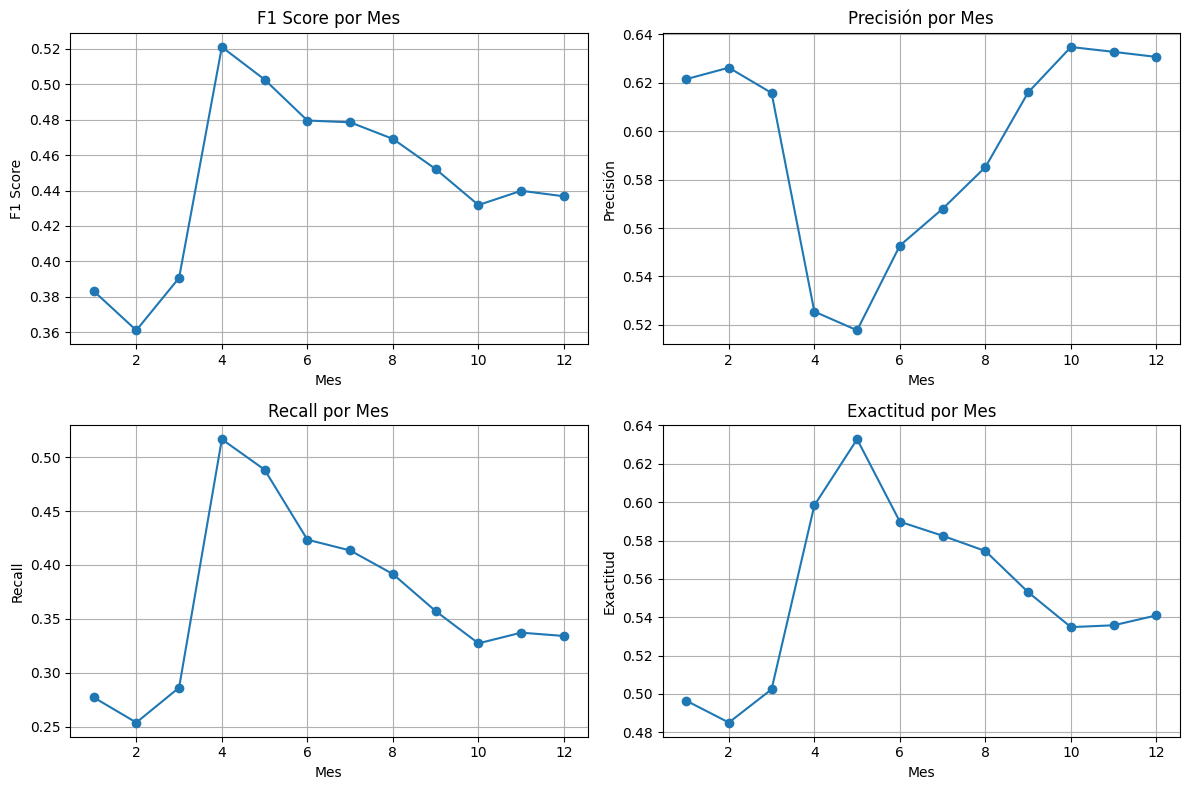

In [20]:
# Plotting the metrics for each month
plt.figure(figsize=(12, 8))

# F1 Score
plt.subplot(2, 2, 1)
plt.plot(resultados_df['mes'], resultados_df['f1_score'], marker='o')
plt.title('F1 Score por Mes')
plt.xlabel('Mes')
plt.ylabel('F1 Score')
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(resultados_df['mes'], resultados_df['precision'], marker='o')
plt.title('Precisión por Mes')
plt.xlabel('Mes')
plt.ylabel('Precisión')
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(resultados_df['mes'], resultados_df['recall'], marker='o')
plt.title('Recall por Mes')
plt.xlabel('Mes')
plt.ylabel('Recall')
plt.grid(True)

# Accuracy
plt.subplot(2, 2, 4)
plt.plot(resultados_df['mes'], resultados_df['accuracy'], marker='o')
plt.title('Exactitud por Mes')
plt.xlabel('Mes')
plt.ylabel('Exactitud')
plt.grid(True)

plt.tight_layout()
plt.show()


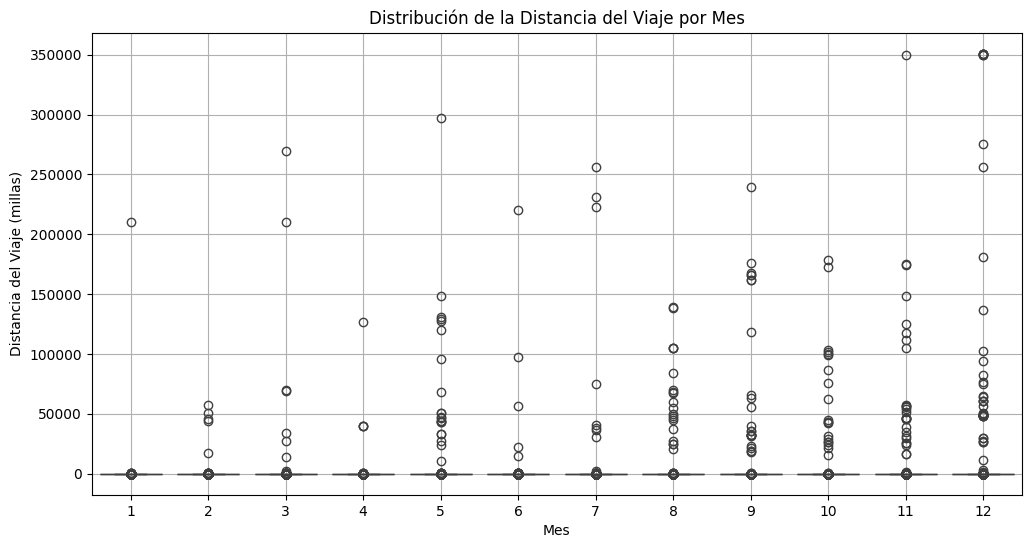

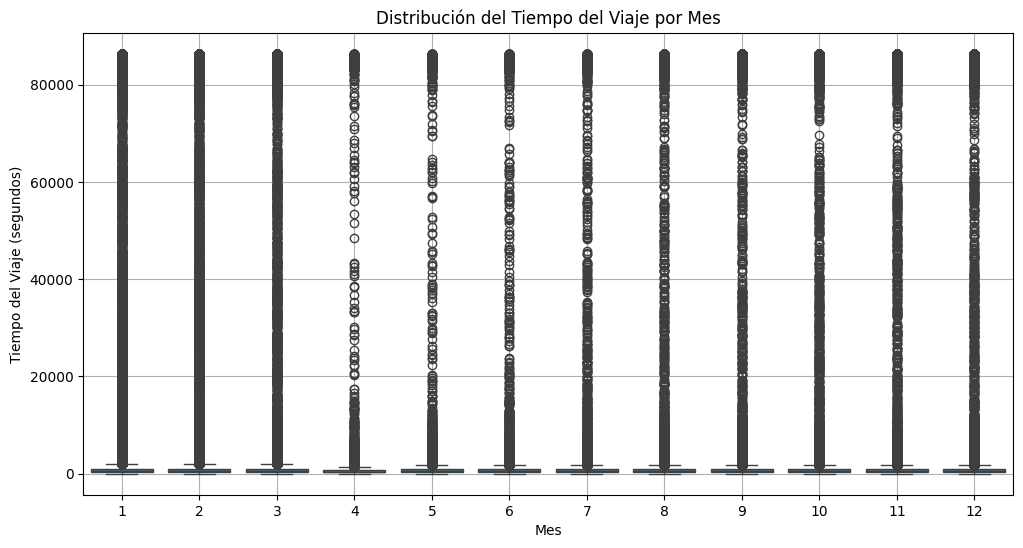

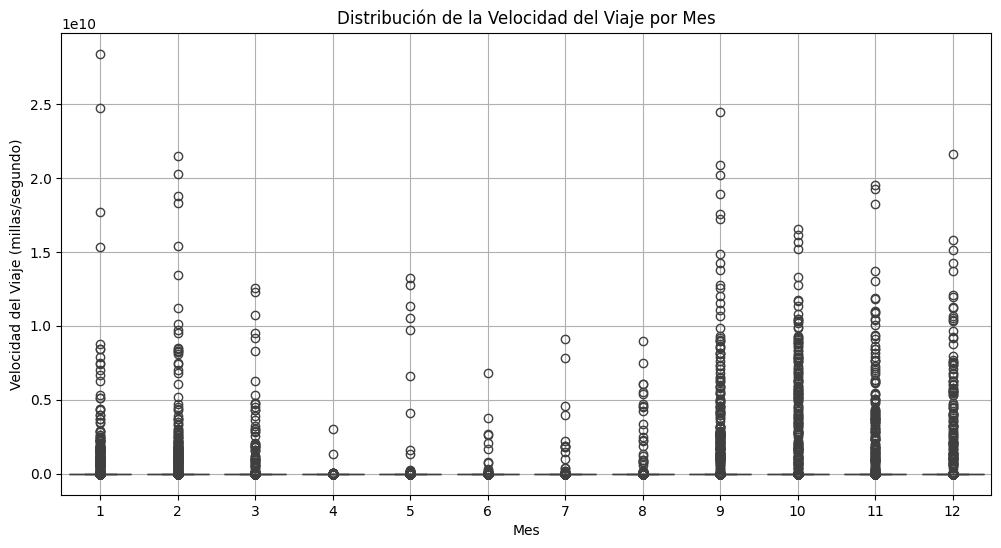

In [24]:
# Graficar la distribución de la distancia del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_distance', data=combined_data)
plt.title('Distribución de la Distancia del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Distancia del Viaje (millas)')
plt.grid(True)
plt.show()

# Graficar la distribución del tiempo del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_time', data=combined_data)
plt.title('Distribución del Tiempo del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Tiempo del Viaje (segundos)')
plt.grid(True)
plt.show()

# Graficar la distribución de la velocidad del viaje por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='trip_speed', data=combined_data)
plt.title('Distribución de la Velocidad del Viaje por Mes')
plt.xlabel('Mes')
plt.ylabel('Velocidad del Viaje (millas/segundo)')
plt.grid(True)
plt.show()


### Conclusión

#### Rendimiento del Modelo por Mes
El rendimiento del modelo, medido a través de métricas como F1-score, precisión, recall y exactitud, muestra variaciones significativas a lo largo de los meses. Estos cambios reflejan la capacidad del modelo para predecir propinas altas en diferentes periodos del año.

#### Explicación con Distribuciones de Características
Los gráficos de distribución de características proporcionan información sobre las razones detrás de las variaciones en el rendimiento del modelo.

1. **Distribución de la Distancia del Viaje**:
   La variabilidad en la distancia de los viajes a lo largo de los meses puede influir en la capacidad del modelo para predecir propinas. Meses con viajes más cortos o más largos de lo habitual pueden afectar la precisión del modelo.

2. **Distribución del Tiempo del Viaje**:
   El tiempo del viaje muestra una amplia variabilidad, con ciertos meses teniendo tiempos de viaje más largos. Esto puede impactar el rendimiento del modelo, especialmente en meses donde el tráfico u otros factores externos influyen significativamente en la duración de los viajes.

3. **Distribución de la Velocidad del Viaje**:
   La velocidad del viaje también varía considerablemente entre los meses. Meses con velocidades promedio más altas o bajas pueden indicar condiciones de tráfico o comportamientos de los usuarios que afectan la predicción de propinas.

En resumen, las variaciones en el rendimiento del modelo pueden explicarse en parte por los cambios en las características clave de los datos a lo largo del año. Estos gráficos de distribución destacan cómo factores como la distancia, el tiempo y la velocidad del viaje influyen en la capacidad del modelo para predecir propinas altas, subrayando la importancia de considerar estos elementos al ajustar y mejorar el modelo para diferentes contextos temporales.
